In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Medicalpremium.csv')

In [3]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
df.shape

(986, 11)

In [5]:
df.isna().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [6]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


## **Performing EDA**

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Diabetes'}>,
        <AxesSubplot:title={'center':'BloodPressureProblems'}>],
       [<AxesSubplot:title={'center':'AnyTransplants'}>,
        <AxesSubplot:title={'center':'AnyChronicDiseases'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'KnownAllergies'}>,
        <AxesSubplot:title={'center':'HistoryOfCancerInFamily'}>],
       [<AxesSubplot:title={'center':'NumberOfMajorSurgeries'}>,
        <AxesSubplot:title={'center':'PremiumPrice'}>, <AxesSubplot:>]],
      dtype=object)

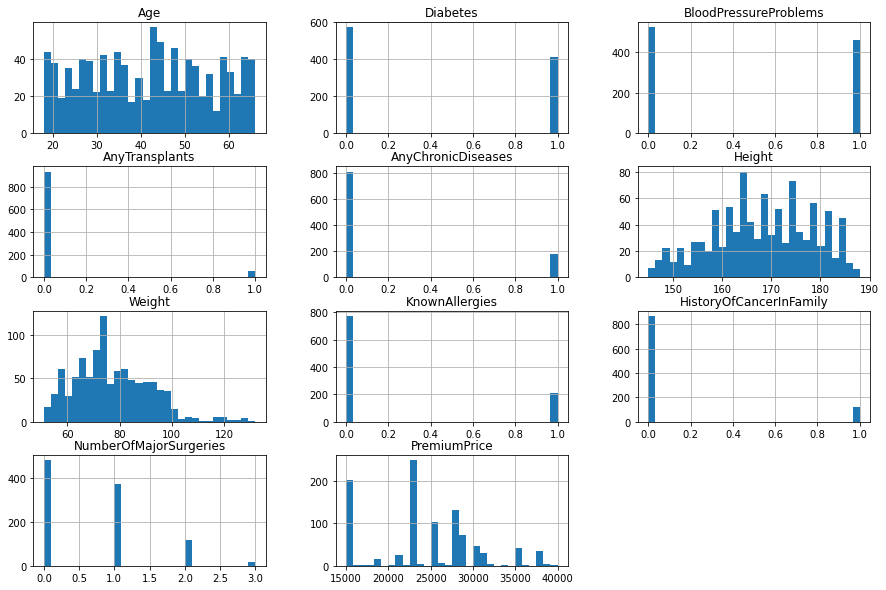

In [7]:
df.hist(bins=30, figsize=(15, 10))

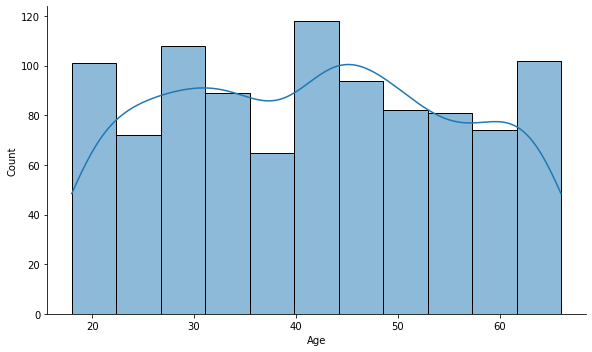

In [8]:
sns.displot(x='Age',data=df,aspect=10/6,kde=True)

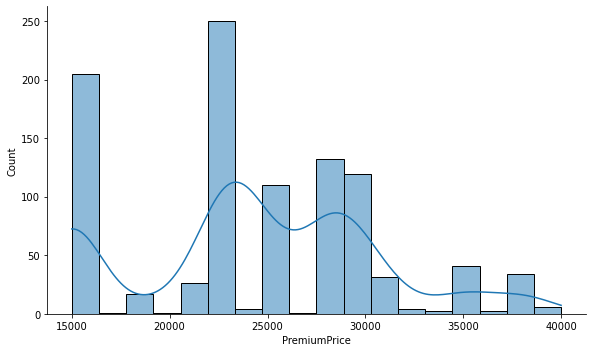

In [9]:
sns.displot(x='PremiumPrice',data=df,aspect=10/6,kde=True)

In [10]:
pr_lab=['Low','Basic','Average','High','SuperHigh']
df['PremiumLabel']=pr_bins=pd.cut(df['PremiumPrice'],bins=5,labels=pr_lab,precision=0)

<AxesSubplot:xlabel='PremiumLabel', ylabel='Age'>

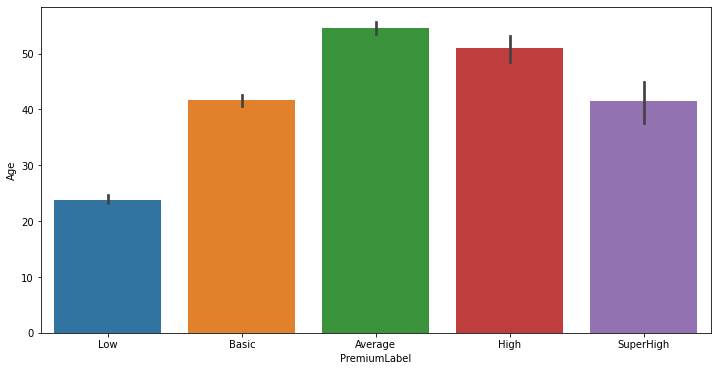

In [11]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(y='Age',x='PremiumLabel',data=df,ax=ax)

<AxesSubplot:xlabel='PremiumLabel', ylabel='Age'>

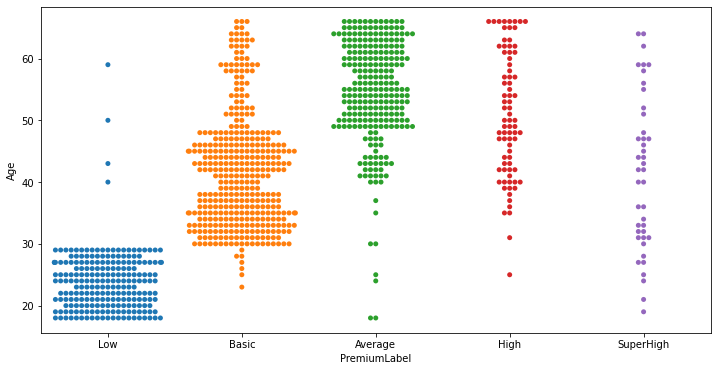

In [12]:
fig,ax=plt.subplots(figsize=(12,6))
sns.swarmplot(x='PremiumLabel',y='Age',data=df,ax=ax)

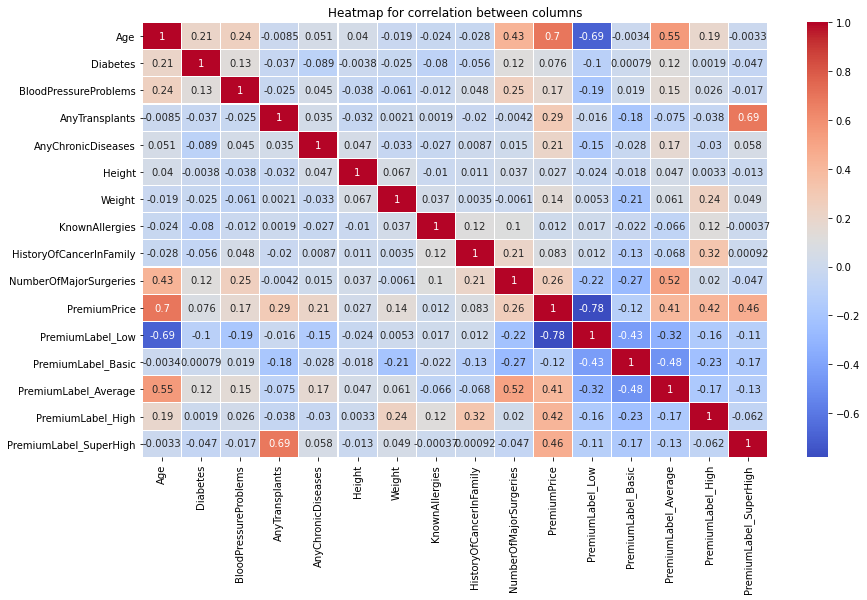

In [27]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.title("Heatmap for correlation between columns")
plt.show()

In [14]:
X = df.drop(['PremiumPrice','PremiumLabel'],axis=1)
y = df.PremiumPrice

In [15]:
from sklearn.preprocessing import MinMaxScaler
scalar =  MinMaxScaler()
X.Age = scalar.fit_transform(X[['Age']])
X.Height = scalar.fit_transform(X[['Height']])
X.Weight = scalar.fit_transform(X[['Weight']])

In [16]:
X.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,0.562500,0,0,0,0,0.232558,0.074074,0,0,0
1,0.875000,1,0,0,0,0.813953,0.271605,0,0,0
2,0.375000,1,1,0,0,0.302326,0.098765,0,0,1
3,0.708333,1,1,0,1,0.883721,0.518519,0,0,2
4,0.416667,0,0,0,1,0.488372,0.456790,0,0,1


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [18]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [19]:
models = {
    LinearRegression():'Linear Regression',
    Lasso():'Lasso',
    XGBRFRegressor():'XGBRFRegressor',
    RandomForestRegressor():'RandomForest'
}
for m in models.keys():
    m.fit(X_train,y_train)

In [20]:
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")
     pred = model.predict(X_test)
     print(f"R_square score for {name} is ", r2_score(pred,y_test))
     print(f"Mean absolute error for {name} is ", mean_absolute_error(pred,y_test))
     print()

Accuracy Score for Linear Regression is :  68.94071160558988 %
R_square score for Linear Regression is  0.5423162481703732
Mean absolute error for Linear Regression is  2627.617841914521

Accuracy Score for Lasso is :  68.92993969805231 %
R_square score for Lasso is  0.5408551027506547
Mean absolute error for Lasso is  2627.5356649454384

Accuracy Score for XGBRFRegressor is :  79.73776806385561 %
R_square score for XGBRFRegressor is  0.7144358974902563
Mean absolute error for XGBRFRegressor is  1407.4829298847853

Accuracy Score for RandomForest is :  79.80945696971636 %
R_square score for RandomForest is  0.71906349112828
Mean absolute error for RandomForest is  1194.4949494949494



###  MAKING LABEL FOR PREMIUM AND RUNNING MODELS

In [21]:
df=pd.get_dummies(data=df,columns=['PremiumLabel'])

In [22]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel_Low,PremiumLabel_Basic,PremiumLabel_Average,PremiumLabel_High,PremiumLabel_SuperHigh
0,45,0,0,0,0,155,57,0,0,0,25000,0,1,0,0,0
1,60,1,0,0,0,180,73,0,0,0,29000,0,0,1,0,0
2,36,1,1,0,0,158,59,0,0,1,23000,0,1,0,0,0
3,52,1,1,0,1,183,93,0,0,2,28000,0,0,1,0,0
4,38,0,0,0,1,166,88,0,0,1,23000,0,1,0,0,0


In [23]:
x1=df.drop('PremiumPrice',axis=1)
y1=df['PremiumPrice']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=43)

In [25]:
models = {
    LinearRegression():'Linear Regression',
    Lasso():'Lasso',
    XGBRFRegressor():'XGBRFRegressor',
    RandomForestRegressor():'RandomForest'
}
for m in models.keys():
    m.fit(X_train,y_train)

In [26]:
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")
     pred = model.predict(X_test)
     print(f"R_square score for {name} is ", r2_score(pred,y_test))
     print(f"Mean absolute error for {name} is ", mean_absolute_error(pred,y_test))
     print()

Accuracy Score for Linear Regression is :  98.56380001513672 %
R_square score for Linear Regression is  0.9848369992757599
Mean absolute error for Linear Regression is  589.4320717008293

Accuracy Score for Lasso is :  98.55713226870688 %
R_square score for Lasso is  0.9847439609116692
Mean absolute error for Lasso is  590.0852460054539

Accuracy Score for XGBRFRegressor is :  99.70519278123606 %
R_square score for XGBRFRegressor is  0.996938801530734
Mean absolute error for XGBRFRegressor is  114.72949711963383

Accuracy Score for RandomForest is :  99.76712591318925 %
R_square score for RandomForest is  0.9975890018903818
Mean absolute error for RandomForest is  82.52525252525253

